In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
# data_importing
df = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\Bharath Intern\\NFLX.csv")
# fetching first 10 rows of dataset
df.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
5,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
6,2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
7,2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
8,2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600
9,2002-06-06,1.150000,1.232143,1.148571,1.182143,1.182143,2305800


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100
5043,2022-06-03,200.139999,202.949997,198.050003,198.979996,198.979996,7181700


In [4]:
df.shape

(5044, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [7]:
# check for non-null values
df.count()

Date         5044
Open         5044
High         5044
Low          5044
Close        5044
Adj Close    5044
Volume       5044
dtype: int64

In [8]:
#checking for the null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
#Check for required columns
df = df[['Date','Open','Close']] 

# converting object dtype of date column to datetime dtype
 
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) 

df.set_index('Date',drop=True,inplace=True) 
df.head(10)

,Open,Close
Date,,
2002-05-23,1.156429,1.196429
2002-05-24,1.214286,1.210000
2002-05-28,1.213571,1.157143
2002-05-29,1.164286,1.103571
2002-05-30,1.107857,1.071429
2002-05-31,1.078571,1.076429
2002-06-03,1.080000,1.128571
2002-06-04,1.135714,1.117857
2002-06-05,1.110714,1.147143


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

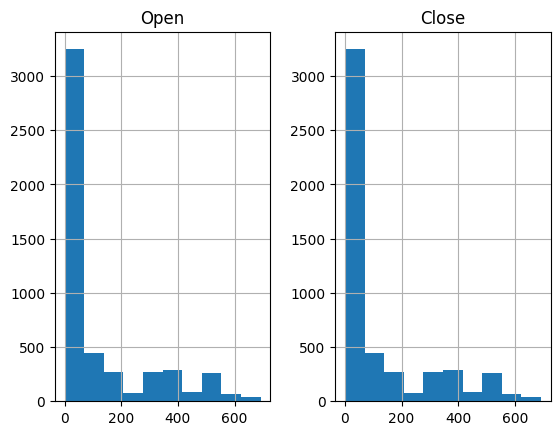

In [11]:
df.hist()

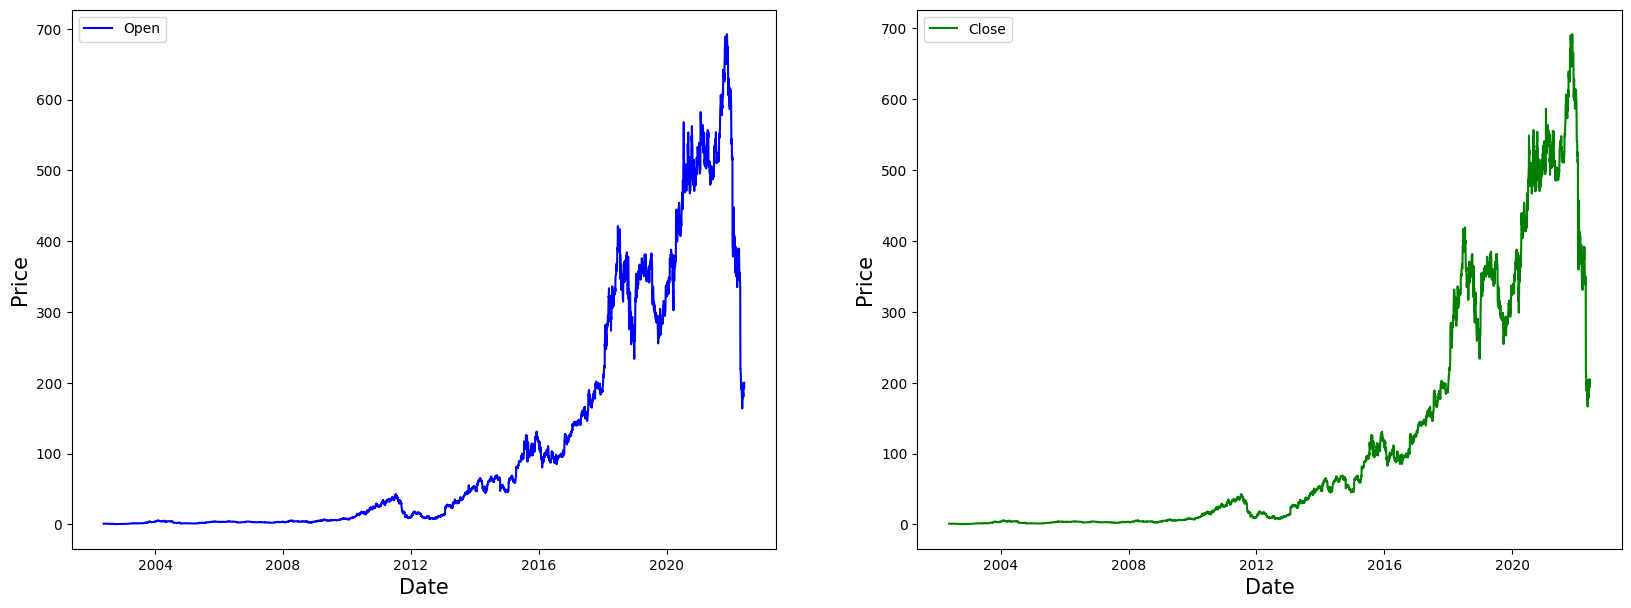

In [12]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [13]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2002-05-23,0.001125,0.001191
2002-05-24,0.001209,0.001211
2002-05-28,0.001208,0.001134
2002-05-29,0.001137,0.001057
2002-05-30,0.001055,0.001010
2002-05-31,0.001013,0.001018
2002-06-03,0.001015,0.001093
2002-06-04,0.001095,0.001078
2002-06-05,0.001059,0.001120


In [14]:
df.tail(10)

,Open,Close
Date,,
2022-05-20,0.268063,0.269019
2022-05-23,0.268468,0.270595
2022-05-24,0.262470,0.260325
2022-05-25,0.259985,0.271159
2022-05-26,0.268959,0.276323
2022-05-27,0.278641,0.281806
2022-05-31,0.282962,0.285060
2022-06-01,0.286604,0.278508
2022-06-02,0.276951,0.296126


In [15]:
training_size = round(len(df) * 0.75) 

In [16]:
training_size

3783

In [17]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((3783, 2), (1261, 2))

In [18]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [19]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3733, 50, 2), (3733, 2), (1211, 50, 2), (1211, 2))

In [20]:
# imported Sequential from keras.models 
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=25))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)


Epoch 1/100
117/117 [==============================] - 19s 90ms/step - loss: 4.6954e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0055 - val_mean_absolute_error: 0.0545
Epoch 2/100
117/117 [==============================] - 9s 73ms/step - loss: 2.5628e-05 - mean_absolute_error: 0.0029 - val_loss: 0.0068 - val_mean_absolute_error: 0.0624
Epoch 3/100
117/117 [==============================] - 8s 72ms/step - loss: 2.5054e-05 - mean_absolute_error: 0.0029 - val_loss: 0.0057 - val_mean_absolute_error: 0.0569
Epoch 4/100
117/117 [==============================] - 8s 72ms/step - loss: 2.3987e-05 - mean_absolute_error: 0.0029 - val_loss: 0.0046 - val_mean_absolute_error: 0.0506
Epoch 5/100
117/117 [==============================] - 8s 71ms/step - loss: 2.1559e-05 - mean_absolute_error: 0.0027 - val_loss: 0.0032 - val_mean_absolute_error: 0.0408
Epoch 6/100
117/117 [==============================] - 8s 72ms/step - loss: 2.2239e-05 - mean_absolute_error: 0.0028 - val_loss: 0.0051 - val_mean_ab

Epoch 49/100
117/117 [==============================] - 8s 70ms/step - loss: 9.1712e-06 - mean_absolute_error: 0.0018 - val_loss: 0.0013 - val_mean_absolute_error: 0.0266
Epoch 50/100
117/117 [==============================] - 8s 71ms/step - loss: 8.8693e-06 - mean_absolute_error: 0.0018 - val_loss: 0.0013 - val_mean_absolute_error: 0.0261
Epoch 51/100
117/117 [==============================] - 8s 71ms/step - loss: 9.2816e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0011 - val_mean_absolute_error: 0.0248
Epoch 52/100
117/117 [==============================] - 8s 71ms/step - loss: 9.4301e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0019 - val_mean_absolute_error: 0.0347
Epoch 53/100
117/117 [==============================] - 8s 71ms/step - loss: 8.9082e-06 - mean_absolute_error: 0.0018 - val_loss: 0.0014 - val_mean_absolute_error: 0.0299
Epoch 54/100
117/117 [==============================] - 8s 71ms/step - loss: 1.0103e-05 - mean_absolute_error: 0.0020 - val_loss: 0.0017 - val_me

117/117 [==============================] - 8s 71ms/step - loss: 5.7363e-06 - mean_absolute_error: 0.0015 - val_loss: 2.3260e-04 - val_mean_absolute_error: 0.0094
Epoch 97/100
117/117 [==============================] - 8s 71ms/step - loss: 5.3712e-06 - mean_absolute_error: 0.0015 - val_loss: 3.9096e-04 - val_mean_absolute_error: 0.0136
Epoch 98/100
117/117 [==============================] - 8s 71ms/step - loss: 5.3651e-06 - mean_absolute_error: 0.0014 - val_loss: 5.4243e-04 - val_mean_absolute_error: 0.0172
Epoch 99/100
117/117 [==============================] - 8s 72ms/step - loss: 5.4854e-06 - mean_absolute_error: 0.0015 - val_loss: 3.2538e-04 - val_mean_absolute_error: 0.0128
Epoch 100/100
117/117 [==============================] - 8s 71ms/step - loss: 5.5450e-06 - mean_absolute_error: 0.0014 - val_loss: 2.5923e-04 - val_mean_absolute_error: 0.0109


In [22]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

38/38 [==============================] - 3s 20ms/step


array([[0.24416476, 0.24399026],
       [0.24394599, 0.24374709],
       [0.2419459 , 0.24175714],
       [0.24101561, 0.24081433],
       [0.23786458, 0.2376821 ]], dtype=float32)

In [23]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[169.33307, 169.04752],
       [169.18167, 168.8794 ],
       [167.79767, 167.50372],
       [167.15393, 166.85193],
       [164.97351, 164.68657]], dtype=float32)

In [24]:
# Merging actual and predicted data for better visualization
df1 = pd.concat([df.iloc[-1211:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-1211:].index)], axis=1)


In [25]:
# Inversing normalization/scaling 
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,169.800003,171.000000,169.333069,169.047516
2017-08-15,171.529999,168.500000,169.181671,168.879395
2017-08-16,167.500000,169.979996,167.797668,167.503723
2017-08-17,169.229996,166.089996,167.153931,166.851929
2017-08-18,165.949997,166.539993,164.973511,164.686569


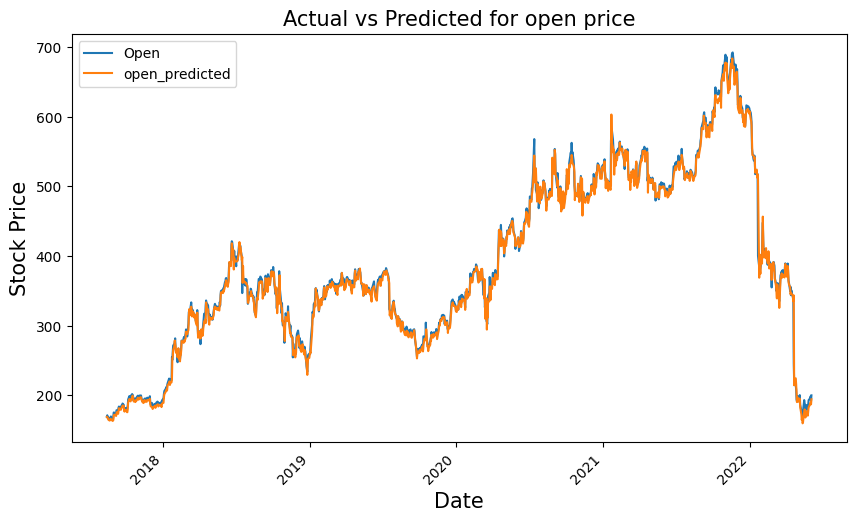

In [26]:
# plotting the actual open and predicted open prices on date index
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

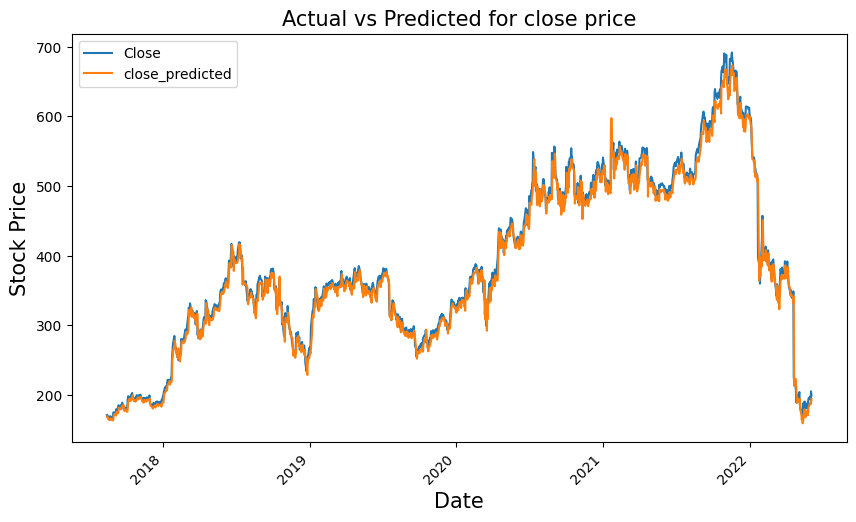

In [27]:
# plotting the actual close and predicted close prices on date index 
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [28]:
df1

,Open,Close,open_predicted,close_predicted
Date,,,,
2017-08-14,169.800003,171.000000,169.333069,169.047516
2017-08-15,171.529999,168.500000,169.181671,168.879395
2017-08-16,167.500000,169.979996,167.797668,167.503723
2017-08-17,169.229996,166.089996,167.153931,166.851929
2017-08-18,165.949997,166.539993,164.973511,164.686569
...,...,...,...,...
2022-05-27,193.190002,195.190002,182.683960,182.326508
2022-05-31,196.179993,197.440002,187.681274,187.334564
2022-06-01,198.699997,192.910004,189.938049,189.617279


In [29]:
# Creating a dataframe and adding 10 days to existing index 

df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,425.494598,419.734070
2022-02-04,407.309998,410.170013,398.199310,393.460358
2022-02-07,410.170013,402.100006,406.137726,402.024078
2022-02-08,398.179993,403.529999,400.138824,396.061279
2022-02-09,408.649994,412.890015,397.182068,393.192047
2022-02-10,402.100006,406.269989,411.507751,407.515320
2022-02-11,405.329987,391.309998,398.726349,394.554718
2022-02-14,387.589996,396.570007,389.942780,386.088959
2022-02-15,403.790009,407.459991,389.368988,385.626831
2022-02-16,401.529999,398.079987,406.948486,403.163666


In [30]:
# creating a DataFrame and filling values of open and close column
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=df1.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 54ms/step


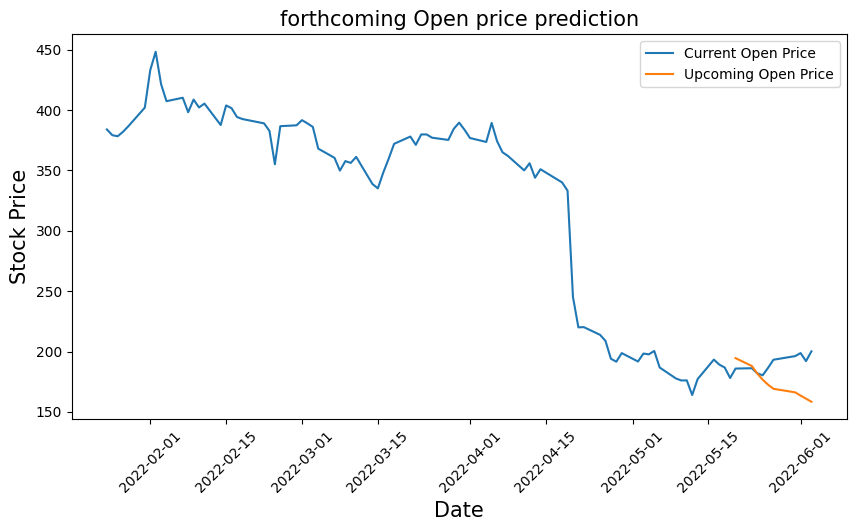

In [31]:
# inversing Normalization/scaling
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])
# plotting forthcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

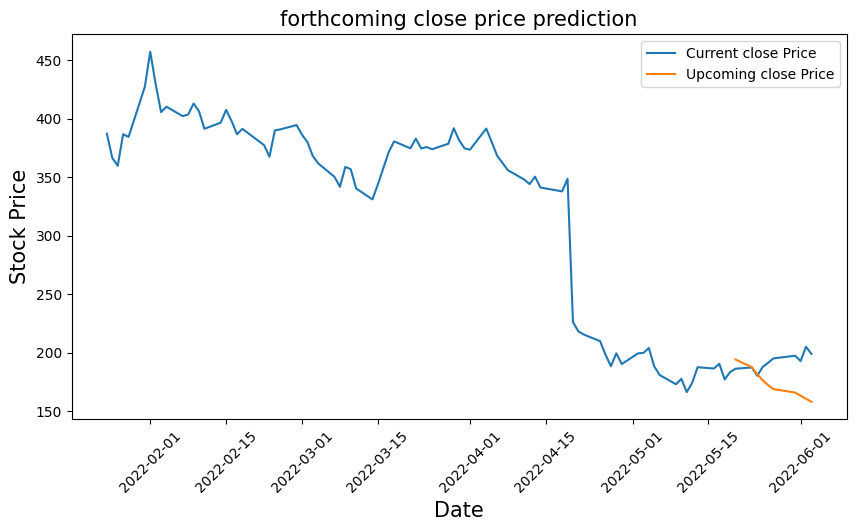

In [32]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()